# La classification multiple

## Introduction

Dans le cadre d'un problème de classification, on peut avoir différent cas pour la target :

- un problème ou il n'y a que deux classes / deux choix possibles pour la prédiction -> problème de classification binaire
- un problème ou il y a plus de deux classes / deux choix possibles pour la prédiction -> problème de classification à multiple classes

On va s'intéresser au second cas et les changements que ça implique concernant les métriques.

## Partie théorique

Lorsque l'on travaille sur un problème de classification multi-classes on peut se retrouver dans le même cas que pour un problème de classification binaire. Soit les classes ont une importance équivalente et l'on cherche à créer un modèle performant sur chacune d'entre elles, soit on cherche à détecter une classe en particulier.

Dans les deux cas il est intéressant de représenter la matrice de confusion pour mieux comprendre le modèle et ses prédictions :
- Sur quelle classe est-il le meilleur ? 
- Sur quelle classe est-il le plus mauvais ? 
- A t'il du mal à faire la distinction entre deux classes sur les n classes ? 

<img src="imgs/multiclass.png">

Dans cette exemple, ou l'objectif est de détecter un animal sur une image, on se rend compte que le modèle est mauvais pour détecter un tigre. On remarque aussi qu'il a du mal à distinguer le loup et le chien lorsqu'il est confronté à une observation de loup.

#### Prédiction pour le multi-classe

Pour effectuer ces prédictions, le modèle peut utiliser deux techniques différentes. Prenons l'exemple d'un problème à trois classes, A, B et C :

- One versus All, chaque classe est comparé avec les autres classes réunies (A vs BC, B vs AC, C vs AB)
- One versus One, chaque classe est comparé avec chaque classe (A vs B, A vs C, B vs C)

Scikit-learn peut gèrer automatiquement la classification à classes mutliples, en réalisant l'une des deux méthodes pour comparer les classes entre elles.

#### Métriques pour le multi-classe

Il existe différents types de scores F1 pour les problèmes multi-classes :
- **macro average** -> on réalise la moyenne des différents scores F1, on ne tient pas compte des proportions des différentes classes
- **weighted average** -> on réalise la moyenne des différents scores F1 en appliquant un coefficient à chaque classe qui est égale à sa proportion au sein du dataset, on tient compte des proportions des différentes classes
- **micro average** ->cette moyenne correspond en réalité à l’accuracy, le nombre de prédictions correctes parmi toutes les observations

En fonction du problème on va vouloir privilégier un score F1 plutôt qu'un autre :
- Dans un jeu de données déséquilibré ou toutes les classes ont la même importances → macro average
- Dans un jeu de données déséquilibré ou on souhaite attribuer plus d’importance à la classe avec la plus forte proportion → weighted average
- Dans le cas d’un jeu de données équilibré et qu’on s’intéresse aux performances globales peut importe la classe → micro average / accuracy

## Partie pratique

### Création d'un jeu de données pour la classification

In [10]:
# Importation des librairies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_predict

In [11]:
# Création d'un jeu de données avec trois classes à prédire

X, y = make_classification(n_samples=10000, n_features=10, n_informative=3, n_classes=3, weights= [0.4, 0.4, 0.2], flip_y=0.5, random_state=42)

### Entrainement du modèle

In [12]:
# Création des train et test set

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42, stratify=y)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

y_train_pred_rf = cross_val_predict(rf_clf, X_train, y_train)

### Matrice de confusion et métriques

,Predicted 0,Predicted 1,Predicted 2
Actual 0,2069,572,297
Actual 1,631,1948,331
Actual 2,603,639,910


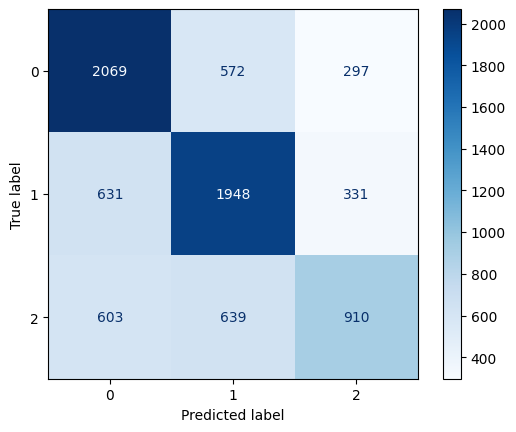

In [14]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_train, y_train_pred_rf)

conf_matrix = pd.DataFrame(cm, index=["Actual 0", "Actual 1", "Actual 2"], columns=["Predicted 0", "Predicted 1", "Predicted 2"])
display(conf_matrix)

graph_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
graph_cm.plot(cmap="Blues")

In [15]:
print(classification_report(y_train, y_train_pred_rf))

              precision    recall  f1-score   support

           0       0.63      0.70      0.66      2938
           1       0.62      0.67      0.64      2910
           2       0.59      0.42      0.49      2152

    accuracy                           0.62      8000
   macro avg       0.61      0.60      0.60      8000
weighted avg       0.61      0.62      0.61      8000

